### Arahan Assignment
0. Gunakan dataset student score
1. Lakukan proses Exploratory data analysis
2. Lakukan feature engineering :
- Check Duplicated Data
- Check Missing Value Handling
- Outlier Analysis
3. Lakukan modelling machine learning regression : gunakan minimal 2 model (linear regression, decision tree regressor, atau random forest regressor)
4. Lakukan evaluasi model
5. Berikan kesimpulan model mana yang terbaik performanya

In [1]:
# Import libraries and resources
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('student_scores.csv')
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# This displays the top 7 rows of the data
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [6]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

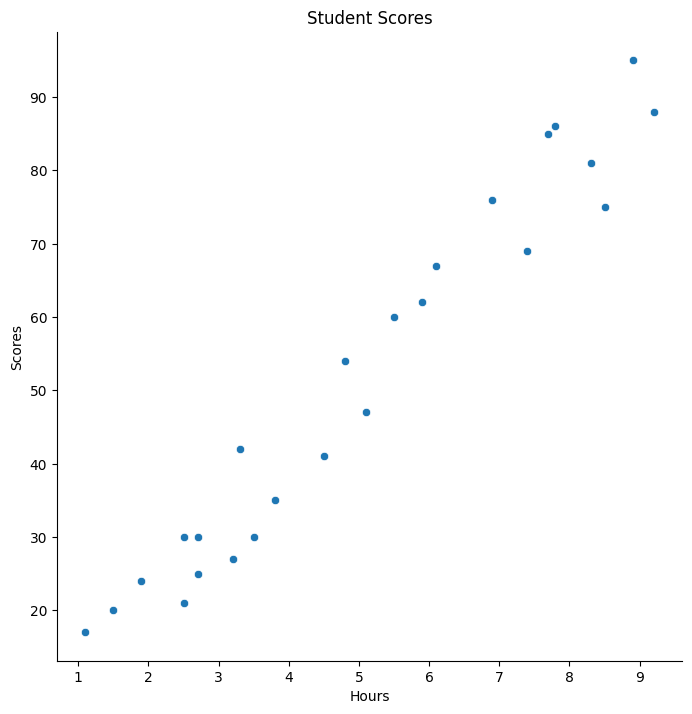

In [7]:
# These Plots help to explain the values and how they are scattered
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.pairplot(dataset,x_vars=['Hours'],y_vars=['Scores'],size=7,kind='scatter')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Student Scores')
plt.show()

## Feature Engineering



1.   Check Duplicated Data
2.   Check Missing Value Handling
3.   Outlier Anlysis
4.   Encoding categorical : change string (categorical) into numerical -> in this dataset, there are no categorical data.





In [8]:
df = dataset.copy()

## Melakukan Pengecekan Duplikat Data

In [9]:
#Check Duplicated Data
print("Data Sebelum Pemeriksaan Duplikat:")
print(df.shape)

Data Sebelum Pemeriksaan Duplikat:
(25, 2)


In [10]:
duplicate_rows_before = df[df.duplicated()]
duplicate_rows_before

,Hours,Scores


In [11]:
df = df.drop_duplicates()

In [12]:
print("\nData Setelah Pemeriksaan Duplikat:")
print(df.shape)


Data Setelah Pemeriksaan Duplikat:
(25, 2)


## Melakukan pengecekan Missing Value

In [13]:
#Check missing value
df.isna().sum()

,0
Hours,0
Scores,0


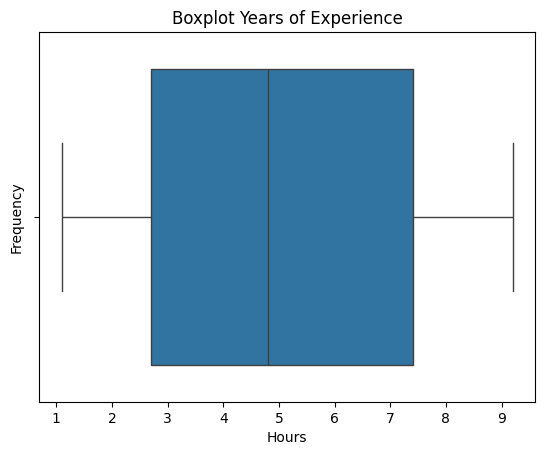

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Outlier Analysis
sns.boxplot(x="Hours", data=df)

# Menambahkan label sumbu dan judul
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.title("Boxplot Years of Experience")

# Menampilkan plot
plt.show()

## There's no outlier value

There are no problems in investigate Feature Engineering, next we are doing machine learning modelling and splitting data into X_train, X_test -> Predictor, y_train, y_test -> target variables. If there are problems in investigate feature engineering then doing splitting data and process feature engineering handling.

# Splitting The Data

In [15]:
# Experience of Years data
X = df['Hours']
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [16]:
# Scores data
y = df['Scores']
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


## Import Machine Learning

In [17]:
# Import machine learning data from scikit learn
from sklearn.model_selection import train_test_split

In [18]:
# Split the data for train and test
# train : test = 75 : 25 atau 80 : 20 atau 70:30 atau 85:15 , size train > test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=42)
# X_train dan y_train -> knowledge dari dosen ke mahasiswa (X_train contoh soal), y_train (kunci jawaban dari contoh soal)
# X_test dan y_test -> soal2 ujian (UTS maupun UAS) (X_test), y_test (kunci jawaban dosennya / data aktual)

In [20]:
X_train

,Hours
1,5.1
22,3.8
5,1.5
2,3.2
12,4.5
15,8.9
3,8.5
4,3.5
20,2.7
17,1.9


In [21]:
X_test

,Hours
8,8.3
16,2.5
0,2.5
23,6.9
11,5.9
9,2.7
13,3.3


# **Linear Regresion**

In [22]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [24]:
# Create new axis for x column in array
import numpy as np

# Convert X_train and X_test to NumPy arrays first
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Add new axis to the end
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [25]:
X_train

array([[5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [26]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [27]:
y_train

,Scores
1,47
22,35
5,20
2,27
12,41
15,95
3,75
4,30
20,30
17,24


In [28]:
y_test

,Scores
8,81
16,30
0,21
23,76
11,62
9,25
13,42


In [29]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression
# Create new axis for x column in array
import numpy as np

# Reshape X_train and X_test to have a single feature column
X_train = X_train.reshape(-1, 1)  # Remove .values since it's already a NumPy array
X_test = X_test.reshape(-1, 1)    # Remove .values since it's already a NumPy array

# Fitting the model using Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred_train = lr_model.predict(X_train)
y_pred_train

array([52.02223727, 39.39391742, 17.05150538, 33.56546211, 46.19378196,
       88.93578761, 85.05015073, 36.47968977, 28.70841601, 20.93714226,
       49.10800962, 61.73632947, 78.25028619, 55.90787415, 77.27887697,
       13.1658685 , 74.36464932, 91.85001526])

In [31]:
y_train

,Scores
1,47
22,35
5,20
2,27
12,41
15,95
3,75
4,30
20,30
17,24


In [32]:
# Predicting the Salary for the Test values
y_pred = lr_model.predict(X_test) # UTS ataupun UAS
# y_pred -> jawaban mahasiswa linear regression

In [33]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [34]:
y_pred

array([83.10733229, 26.76559757, 26.76559757, 69.50760322, 59.79351103,
       28.70841601, 34.53687133])

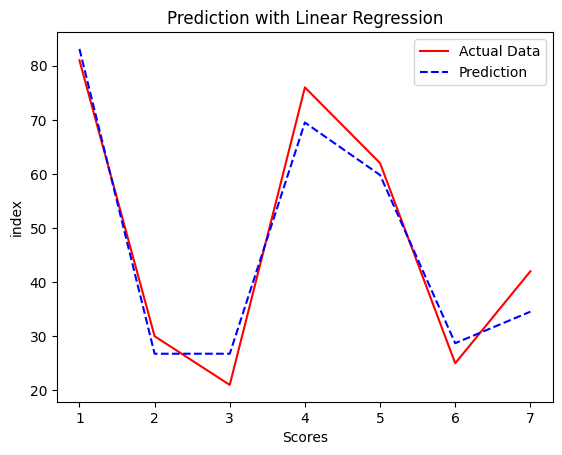

In [35]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Scores')
plt.ylabel('index')
plt.title('Prediction with Linear Regression')
plt.legend()
plt.show()

In [36]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error

In [37]:
# Calculate R square vale
rsq = r2_score(y_test,y_pred)

In [38]:
print('r square Linear Regression:',rsq)

r square Linear Regression: 0.9553509219739938


In [39]:
# Intecept and coeff of the line
print('Intercept of the Linear Regression model:',lr_model.intercept_)
print('Coefficient of the line Linear Regression:',lr_model.coef_)

Intercept of the Linear Regression model: 2.4803670915057623
Coefficient of the line Linear Regression: [9.71409219]


##Then it is said to form a line with result in Linear Regression

## y = 25478.12 + 9731.016 x
with x is the value of year experience work

In [40]:
# y_test = 112635.0
# x_test = 9.6
# y = 25478.12 + 9731.016 * 9.6

nilai_y = 25478.12 + 9731.016 * 9.6
print('nilai y : ', nilai_y )

nilai y :  118895.87359999999


**Decision Tree Regressor** Using another Machine Learning Model :

1.    Decision Tree
2.    Random Forest

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [43]:
# Predicting the Salary for the Test values
y_pred_dt = dt_model.predict(X_test) # soal uts maupun uas

In [44]:
y_pred_dt

array([75., 30., 30., 69., 67., 30., 27.])

In [45]:
y_test

,Scores
8,81
16,30
0,21
23,76
11,62
9,25
13,42


In [46]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

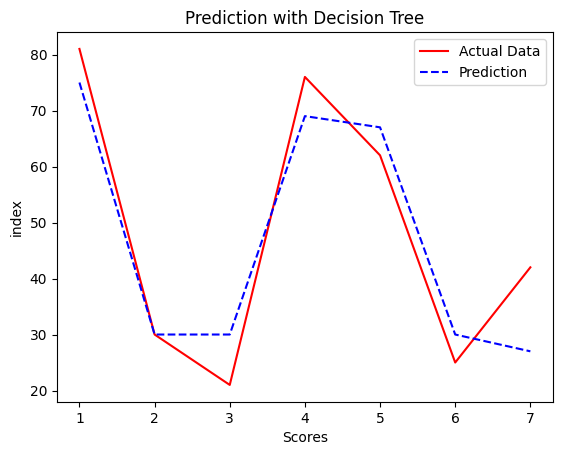

In [47]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_dt,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Scores')
plt.ylabel('index')
plt.title('Prediction with Decision Tree')
plt.legend()
plt.show()

In [48]:
# Calculate R square vale
rsq_dt = r2_score(y_test,y_pred_dt)

In [49]:
print('r square Decision Tree Results:',rsq_dt)

r square Decision Tree Results: 0.8803859268443893


## **Kesimpulan Pengerjaan**

Pengecekan keakuratan data menggunakan metode liner Regresion dan Decision Tree, memiliki tingkat keakuratan data yang cukup sesuai, walau ada beberapa data yang masih melenceng dan sepenuhnya akurat.